In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
# Read the data
file_path = r'C:\Users\GOD\Desktop\Datamites-29112023\Internship Projects\Data\Automobile imports price predict\auto_imports.csv'
data = pd.read_csv(file_path)

In [4]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
# Data cleaning
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

In [6]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [8]:
# Convert numerical columns to float
numerical_cols = [' normalized-losses', ' wheel-base', ' length', ' width', ' height', ' curb-weight',
                  ' engine-size', ' bore', ' stroke', ' compression-ratio', ' horsepower', ' peak-rpm',
                  ' city-mpg', ' highway-mpg', ' price']
data[numerical_cols] = data[numerical_cols].astype(float)

In [12]:
numerical_cols

[' normalized-losses',
 ' wheel-base',
 ' length',
 ' width',
 ' height',
 ' curb-weight',
 ' engine-size',
 ' bore',
 ' stroke',
 ' compression-ratio',
 ' horsepower',
 ' peak-rpm',
 ' city-mpg',
 ' highway-mpg',
 ' price']

In [9]:
# Impute missing values using mean for numerical columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [13]:
data[numerical_cols]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
197,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
198,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
199,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


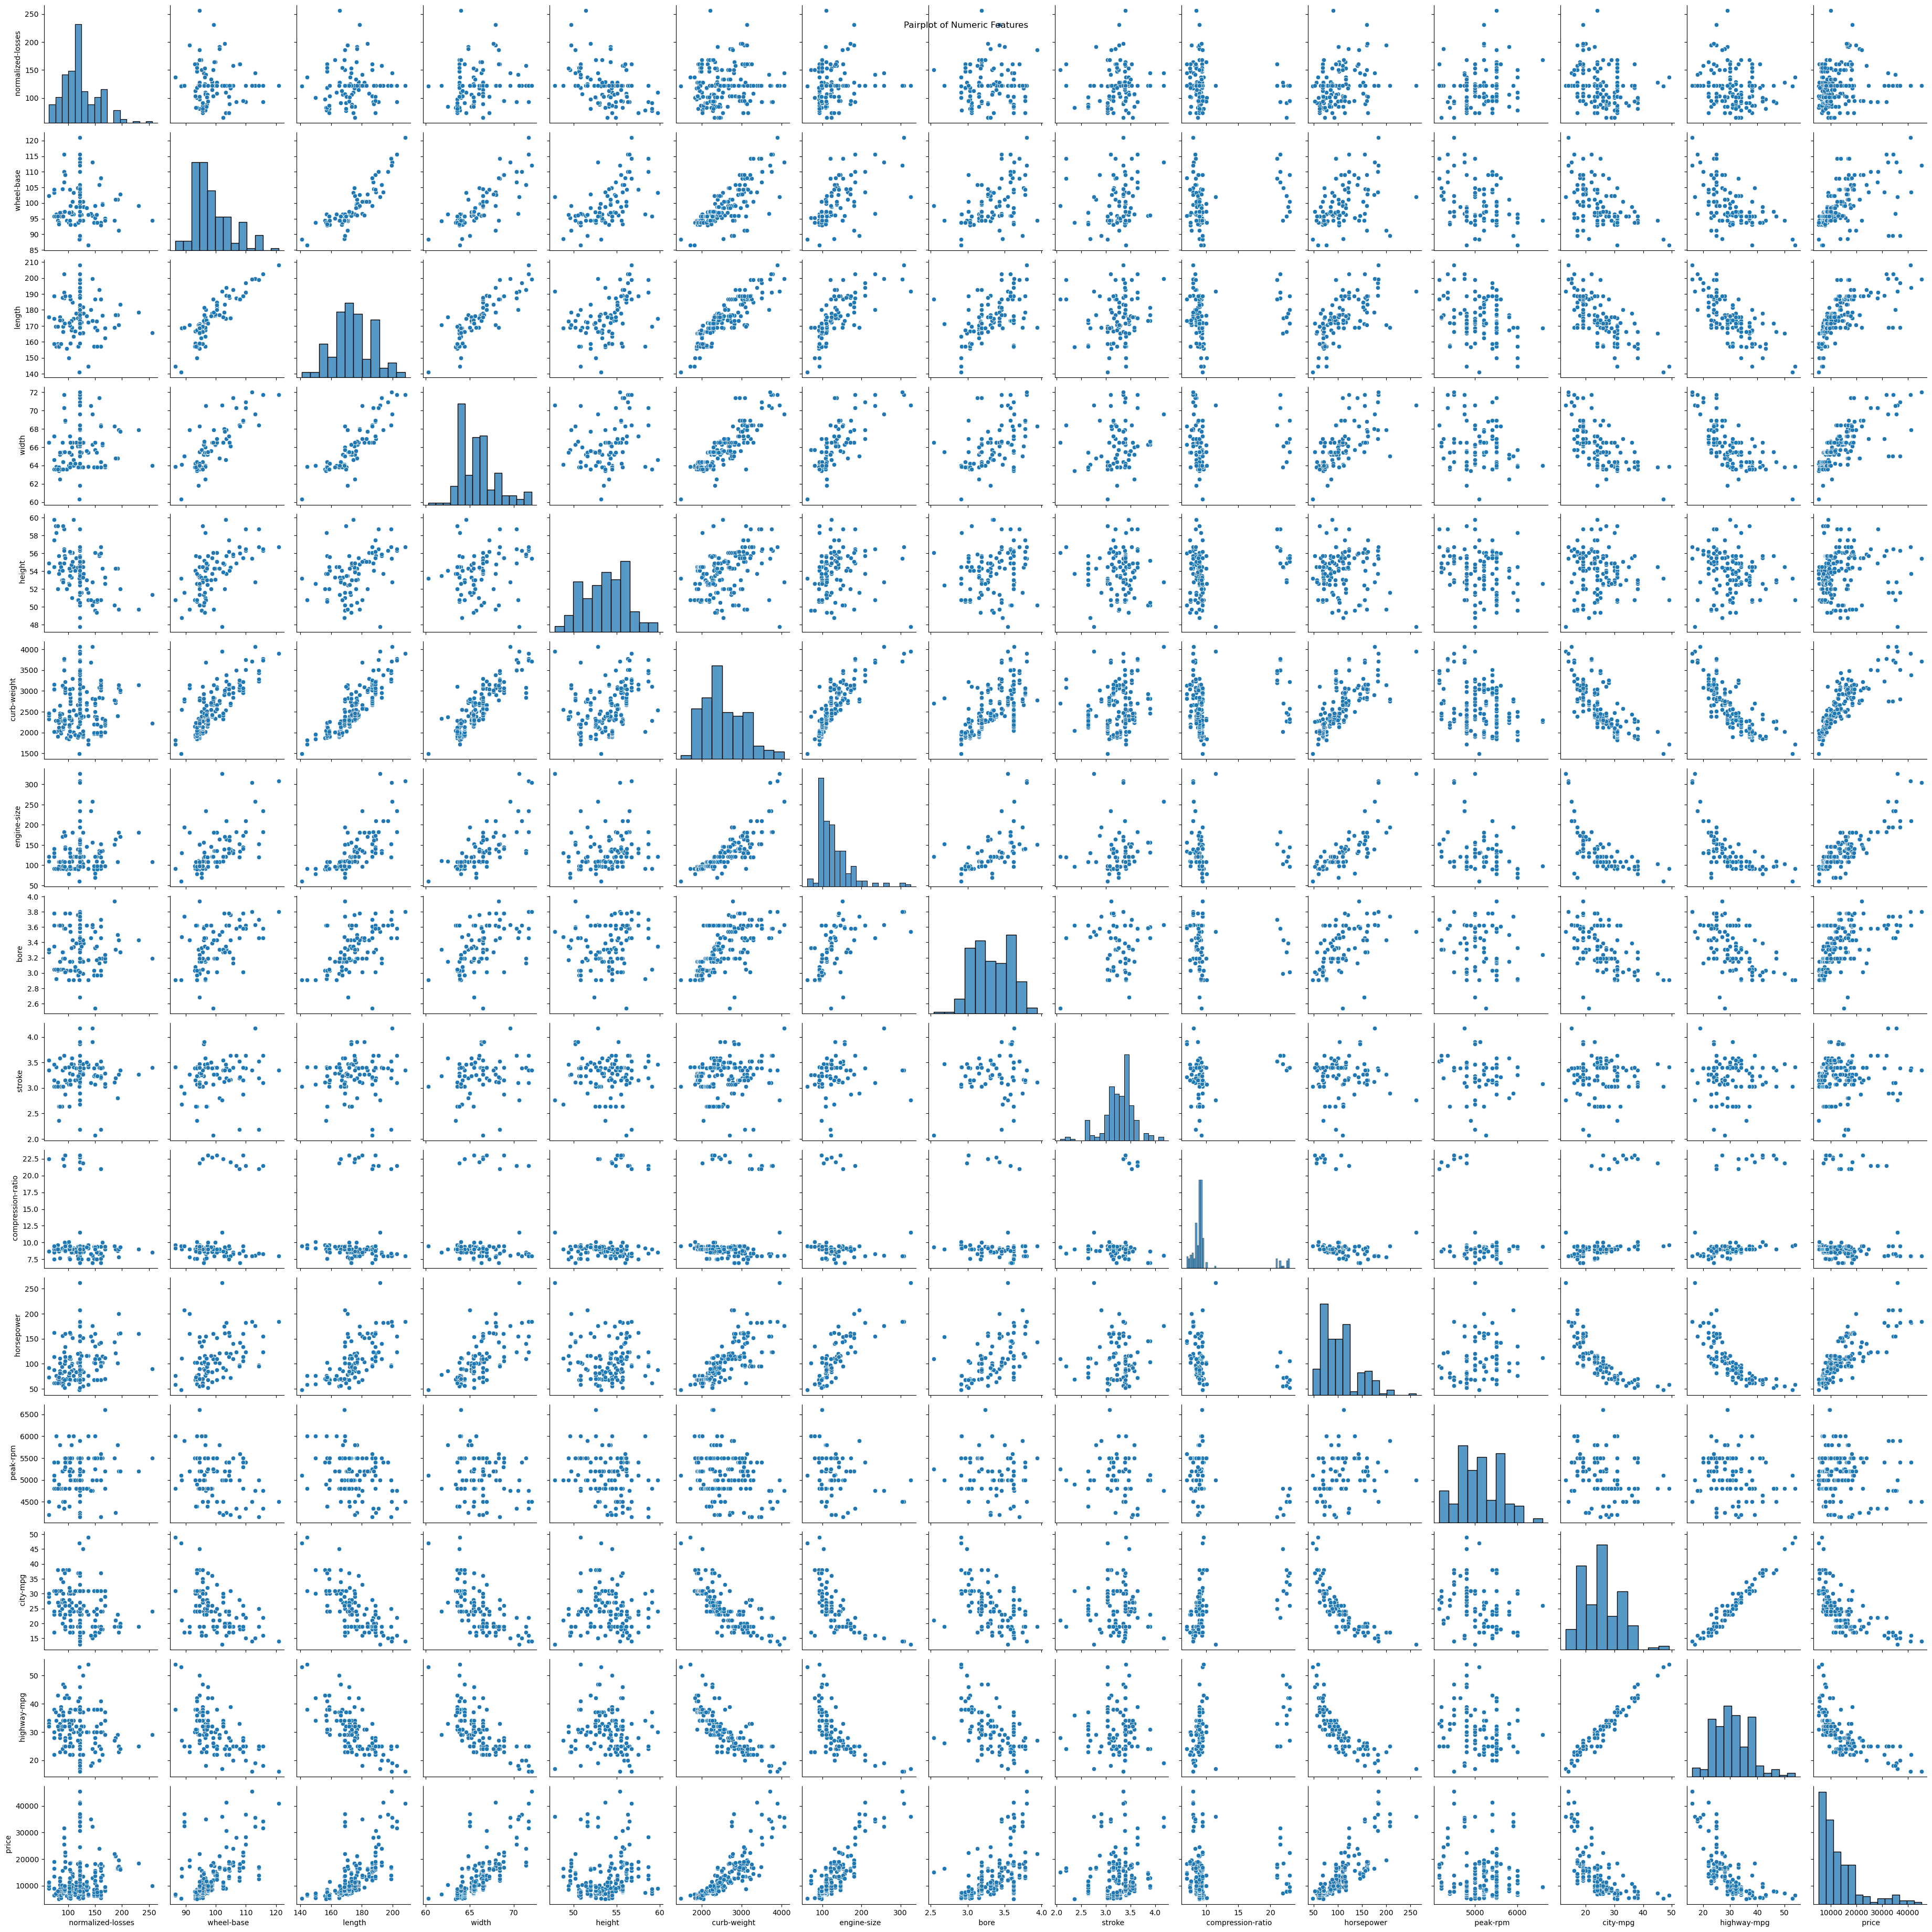

In [28]:
# Pairplot for numeric features
sns.pairplot(data[numerical_cols])
plt.suptitle("Pairplot of Numeric Features")
plt.show()

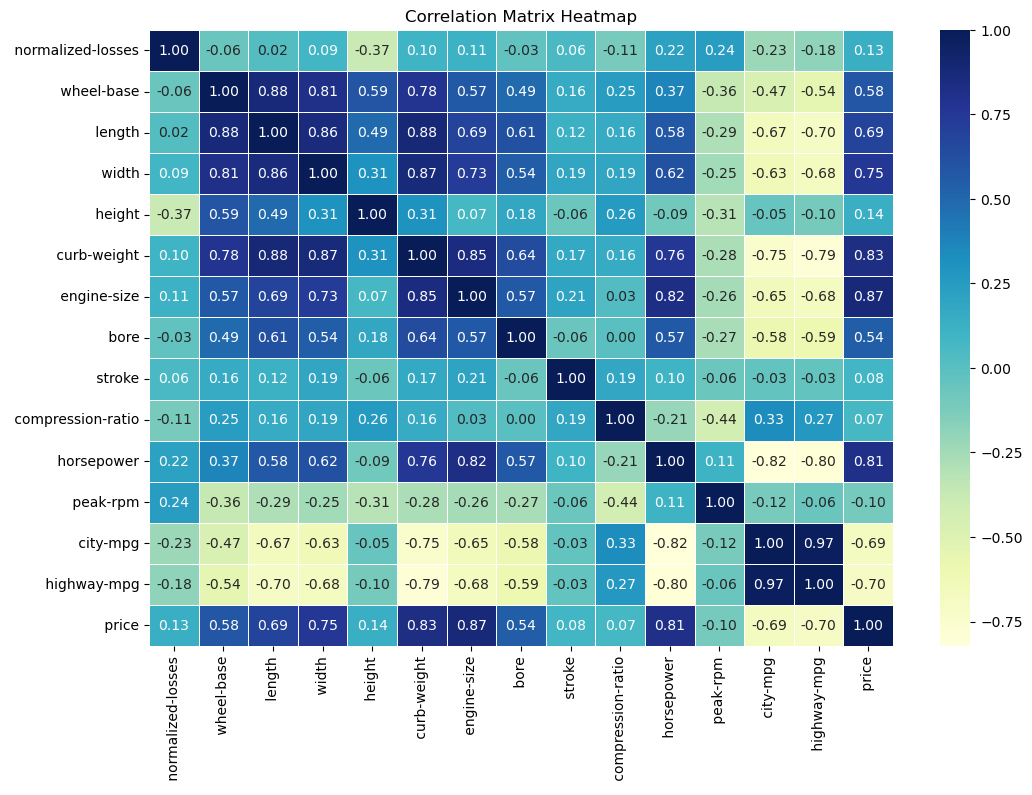

In [35]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

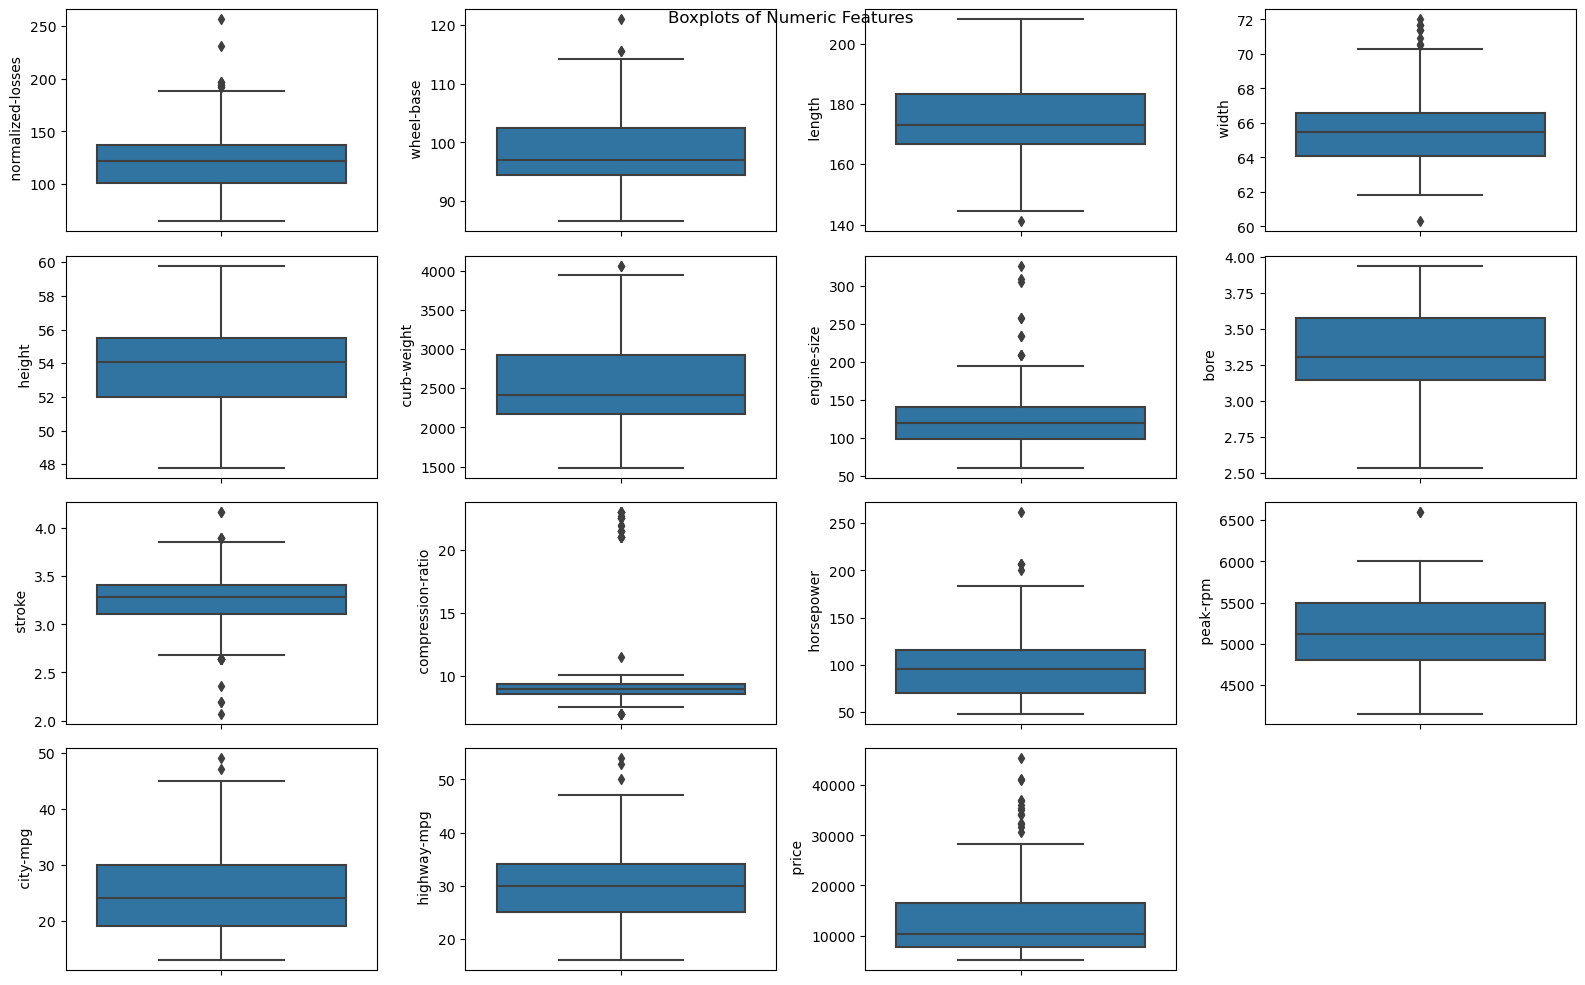

In [30]:
# Boxplots for numeric features
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col])
    plt.ylabel(col)
plt.tight_layout()
plt.suptitle("Boxplots of Numeric Features")
plt.show()

In [14]:
# Encode categorical variables
categorical_cols = [' make', ' fuel-type', ' aspiration', ' num-of-doors', ' body-style',
                    ' drive-wheels', ' engine-location', ' engine-type', ' num-of-cylinders',
                    ' fuel-system']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [15]:
data[col]

0      5
1      5
2      5
3      5
4      5
      ..
196    5
197    5
198    5
199    3
200    5
Name:  fuel-system, Length: 201, dtype: int32

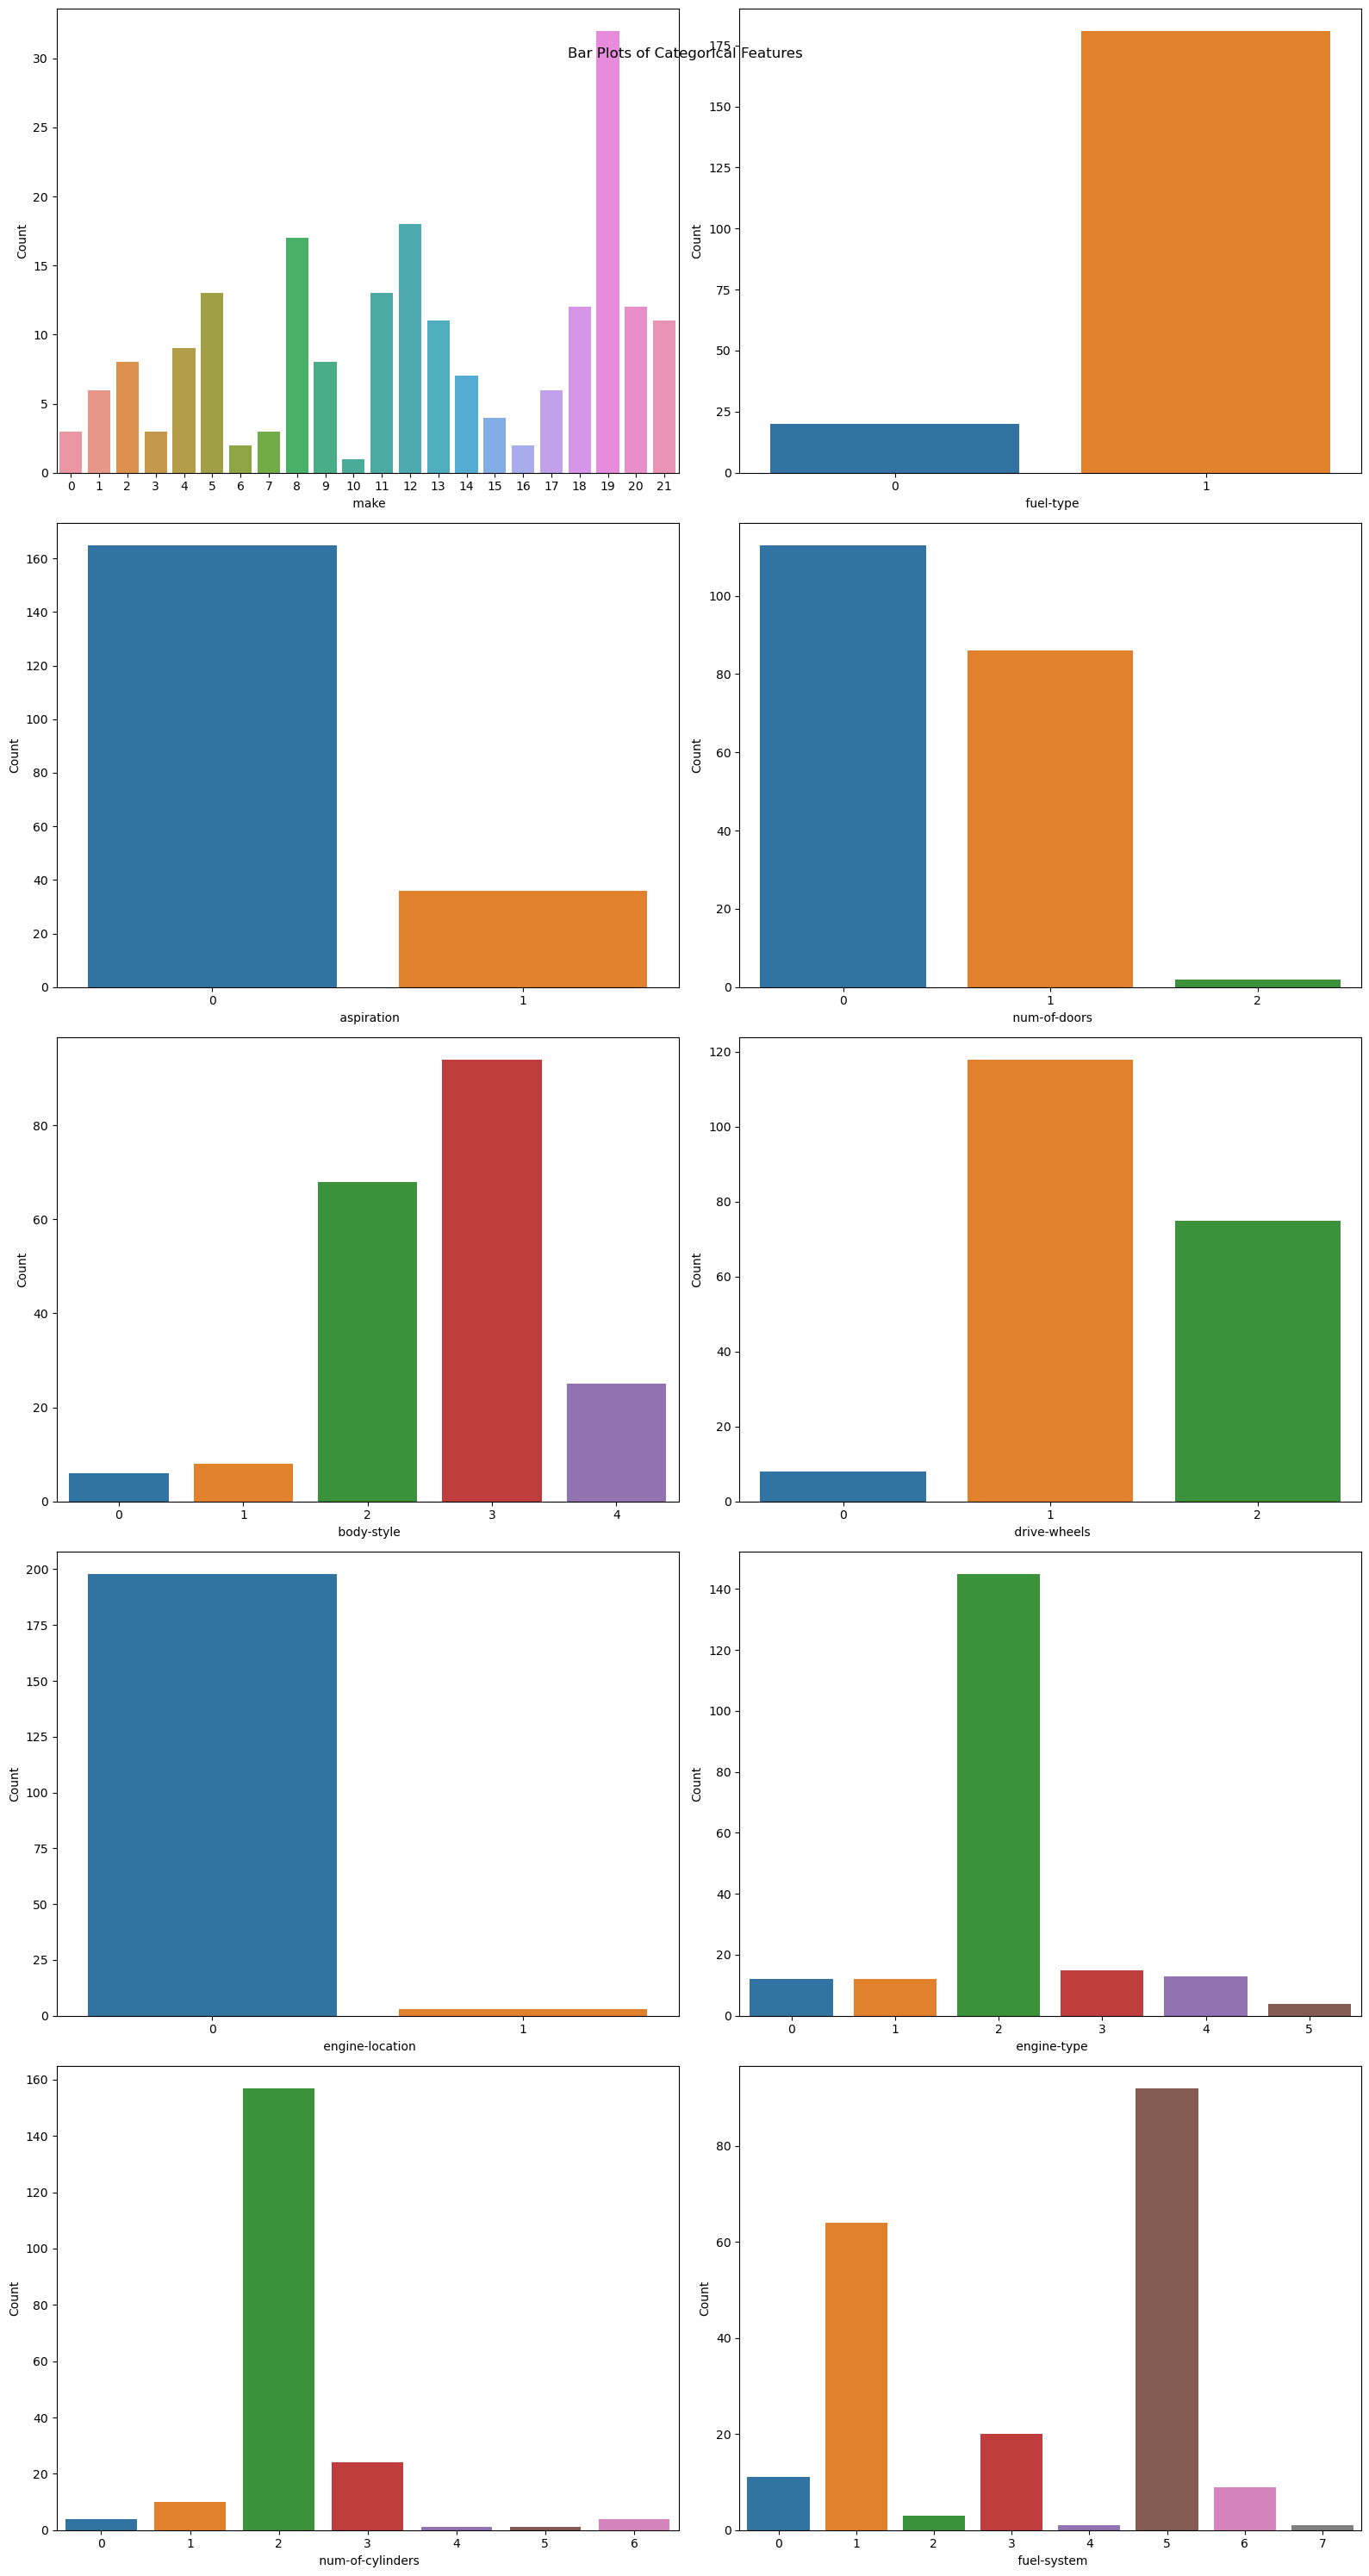

In [33]:
categorical_cols = [' make', ' fuel-type', ' aspiration', ' num-of-doors', ' body-style',
                    ' drive-wheels', ' engine-location', ' engine-type', ' num-of-cylinders',
                    ' fuel-system']
plt.figure(figsize=(16, 30))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(5, 2, i)
    sns.countplot(x=col, data=data)
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.suptitle("Bar Plots of Categorical Features")
plt.show()

In [17]:
# Splitting the dataset into features and target variable
X = data.drop(columns=[' price'])
y = data[' price']

In [18]:
X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,122.0,0,1,0,1,0,2,0,88.6,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,2,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,3,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,2,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,1,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,21,1,0,0,3,2,0,109.1,...,2,141.0,5,3.78,3.15,9.5,114.0,5400.0,23.0,28.0
197,-1,95.0,21,1,1,0,3,2,0,109.1,...,2,141.0,5,3.78,3.15,8.7,160.0,5300.0,19.0,25.0
198,-1,95.0,21,1,0,0,3,2,0,109.1,...,3,173.0,5,3.58,2.87,8.8,134.0,5500.0,18.0,23.0
199,-1,95.0,21,0,1,0,3,2,0,109.1,...,3,145.0,3,3.01,3.40,23.0,106.0,4800.0,26.0,27.0


In [19]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name:  price, Length: 201, dtype: float64

In [20]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

In [23]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2, 'MAE': mae}

In [24]:
# Print results
print("Model Evaluation Results:")
for name, result in results.items():
    print(f"Model: {name}")
    print(f"MSE: {result['MSE']:.2f}")
    print(f"R-squared: {result['R-squared']:.2f}")
    print(f"MAE: {result['MAE']:.2f}")
    print("---------------------")

Model Evaluation Results:
Model: Linear Regression
MSE: 17924387.53
R-squared: 0.85
MAE: 2804.39
---------------------
Model: Decision Tree Regression
MSE: 7662102.59
R-squared: 0.94
MAE: 1819.71
---------------------
Model: Random Forest Regression
MSE: 8943352.21
R-squared: 0.93
MAE: 1851.44
---------------------
Model: Gradient Boosting Regression
MSE: 6495211.34
R-squared: 0.95
MAE: 1582.76
---------------------
Model: Support Vector Regression
MSE: 149145178.23
R-squared: -0.22
MAE: 7942.62
---------------------


In [25]:
# Find the best model
best_model = min(results, key=lambda x: results[x]['MSE'])
print(f"Best Model: {best_model}")

Best Model: Gradient Boosting Regression
